In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from geopy.geocoders import Nominatim


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2.csv')

In [ ]:
data.head()

,Unnamed: 0,PROP_ID,BLD_TYPE,APPRAISER,NBHD,QUAL,COND,KITCHEN_CT,KITCHEN_RATING,FULL_BATH_CT,FULL_BATH_RATING,HALF_BATH_CT,HALF_BATH_RATING,YEAR_BUILT,FINISHED_AREA,LAND_SF,SALE_DATE,SALE_PRICE,APPEALED19,APPEALED20,APPEALED21,ADDRESS,ZIP,GEO_TRACT,city_coord,LAT,LNG
0,0,100001.0,07 - Townhouse,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,2,AV - Average,2.0,AV - Average,2,AV - Average,1980,2464.0,8177.0832,2018-05-30,122500.0,NaN,NaN,NaN,9111-9113 W JOLENO LA,53224.0,201,NaN,43.183377,-88.024591
1,1,100011.0,07 - Townhouse,OLG - Noah Olguin,0040 - 0040,C - C,GD - Good,2,GD - Good,2.0,AV - Average,2,AV - Average,1980,2902.0,9435.0960,2021-01-20,100000.0,NaN,NaN,NaN,9303 W MANOR CT,53224.0,201,NaN,43.184484,-88.025584
2,2,100018.0,05 - Colonial,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,1,VG - Very Good,2.0,VG - Very Good,0,NaN,2008,1771.0,7200.0324,2020-05-22,205000.0,NaN,NaN,NaN,9329 W LARAMIE RD,53224.0,201,NaN,43.185339,-88.026438
3,3,100025.0,01 - Ranch,OLG - Noah Olguin,0040 - 0040,C - C,GD - Good,1,AV - Average,1.0,AV - Average,0,NaN,1951,1041.0,7247.0772,2018-03-23,105000.0,NaN,NaN,NaN,9508 W LARAMIE RD,53224.0,201,NaN,43.185323,-88.027785
4,4,100032.0,07 - Townhouse,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,2,AV - Average,2.0,AV - Average,2,AV - Average,1980,2902.0,9273.9240,2020-01-06,131000.0,NaN,NaN,NaN,9135-9137 N SWAN RD,53224.0,201,NaN,43.184191,-88.024089


In [ ]:
# for i, row in data.iterrows():
#     apiAddress = str(data.at[i,'ADDRESS'])+','+ str(data.at[i,'ZIP'])
    
#     parameters = {
#         "key": "uG0Hz3vHpZX517qqPLqa4NIrmgjrbar5",
#         "location": apiAddress
#     }

#     response = requests.get("http://www.mapquestapi.com/geocoding/v1/address", params=parameters)
#     print(response)
#     dataI = response.text
#     dataJ = json.loads(dataI)['results']
#     lat = (dataJ[0]['locations'][0]['latLng']['lat'])
#     lng = (dataJ[0]['locations'][0]['latLng']['lng'])
    
#     data.at[i,'LAT'] = lat
#     data.at[i,'LNG'] = lng
    

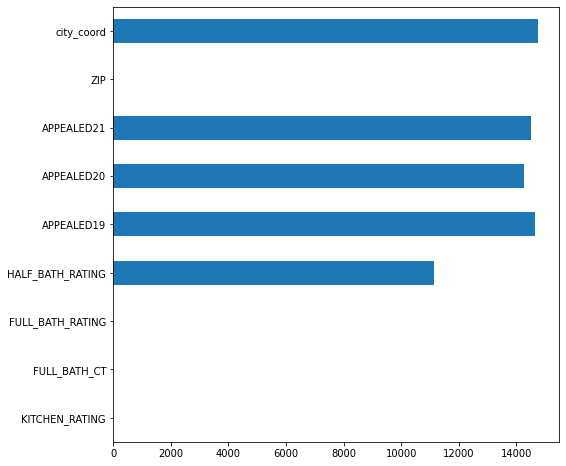

In [ ]:
data_null = data.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null != 0].plot(kind = 'barh');

In [ ]:
data.drop(['PROP_ID','Unnamed: 0', 'city_coord','APPEALED21','APPEALED20','APPEALED19','HALF_BATH_RATING'], axis = 1, inplace = True)

In [ ]:
data.dropna()

,BLD_TYPE,APPRAISER,NBHD,QUAL,COND,KITCHEN_CT,KITCHEN_RATING,FULL_BATH_CT,FULL_BATH_RATING,HALF_BATH_CT,YEAR_BUILT,FINISHED_AREA,LAND_SF,SALE_DATE,SALE_PRICE,ADDRESS,ZIP,GEO_TRACT,LAT,LNG
0,07 - Townhouse,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,2,AV - Average,2.0,AV - Average,2,1980,2464.0,8177.0832,2018-05-30,122500.0,9111-9113 W JOLENO LA,53224.0,201,43.183377,-88.024591
1,07 - Townhouse,OLG - Noah Olguin,0040 - 0040,C - C,GD - Good,2,GD - Good,2.0,AV - Average,2,1980,2902.0,9435.0960,2021-01-20,100000.0,9303 W MANOR CT,53224.0,201,43.184484,-88.025584
2,05 - Colonial,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,1,VG - Very Good,2.0,VG - Very Good,0,2008,1771.0,7200.0324,2020-05-22,205000.0,9329 W LARAMIE RD,53224.0,201,43.185339,-88.026438
3,01 - Ranch,OLG - Noah Olguin,0040 - 0040,C - C,GD - Good,1,AV - Average,1.0,AV - Average,0,1951,1041.0,7247.0772,2018-03-23,105000.0,9508 W LARAMIE RD,53224.0,201,43.185323,-88.027785
4,07 - Townhouse,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,2,AV - Average,2.0,AV - Average,2,1980,2902.0,9273.9240,2020-01-06,131000.0,9135-9137 N SWAN RD,53224.0,201,43.184191,-88.024089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,03 - Split Level,OLG - Noah Olguin,0040 - 0040,C - C,VG - Very Good,1,VG - Very Good,1.0,GD - Good,0,1978,1548.0,8245.9080,2018-08-13,155000.0,9125 N 86TH ST,53224.0,101,43.183574,-88.017512
14751,12 - Duplex N/S,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,2,AV - Average,2.0,AV - Average,0,1978,2136.0,7761.9564,2020-07-15,105000.0,9210--A W ALLYN ST,53224.0,201,43.182663,-88.025372
14752,01 - Ranch,OLG - Noah Olguin,0040 - 0040,C - C,AV - Average,1,VG - Very Good,1.0,VG - Very Good,0,1958,1217.0,8516.8512,2021-04-02,144000.0,9206 N 95TH ST,53224.0,201,43.185066,-88.027497
14753,05 - Colonial,OLG - Noah Olguin,0040 - 0040,C - C,GD - Good,1,VG - Very Good,2.0,VG - Very Good,1,2006,1456.0,7176.0744,2020-10-30,185000.0,9149 N 94TH ST,53224.0,201,43.184812,-88.026465


In [ ]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,KITCHEN_CT,FULL_BATH_CT,HALF_BATH_CT,YEAR_BUILT,FINISHED_AREA,LAND_SF,SALE_PRICE,ZIP,GEO_TRACT,LAT,LNG
count,14755.000000,14742.000000,14755.000000,14755.000000,14755.000000,14755.000000,1.475500e+04,14743.000000,14755.000000,14755.000000,14755.000000
mean,1.244731,1.416022,0.263301,1939.646222,1516.501593,6123.513469,1.564298e+05,53215.215763,13366.961233,42.970545,-88.071643
std,0.457587,0.572031,0.484830,24.646344,614.198374,3780.919321,8.886215e+04,6.396768,23297.308174,1.320180,2.785168
min,1.000000,1.000000,0.000000,1836.000000,450.000000,0.000000,0.000000e+00,53202.000000,101.000000,26.280679,-125.208715
10%,1.000000,1.000000,0.000000,1904.000000,931.000000,3599.798400,6.200000e+04,53207.000000,1200.000000,42.973821,-88.026347
25%,1.000000,1.000000,0.000000,1923.000000,1081.000000,4724.517600,1.050000e+05,53209.000000,3800.000000,42.988954,-88.007114
50%,1.000000,1.000000,0.000000,1948.000000,1341.000000,5376.175200,1.495000e+05,53216.000000,8000.000000,43.064223,-87.974018
75%,1.000000,2.000000,0.000000,1956.000000,1837.500000,7041.038400,1.900000e+05,53221.000000,19300.000000,43.092105,-87.932454
90%,2.000000,2.000000,1.000000,1964.000000,2332.000000,8853.744240,2.480000e+05,53223.000000,20700.000000,43.123985,-87.898403
max,4.000000,13.000000,10.000000,2021.000000,9698.000000,218162.854800,1.630000e+06,53233.000000,187000.000000,58.808374,-60.556741


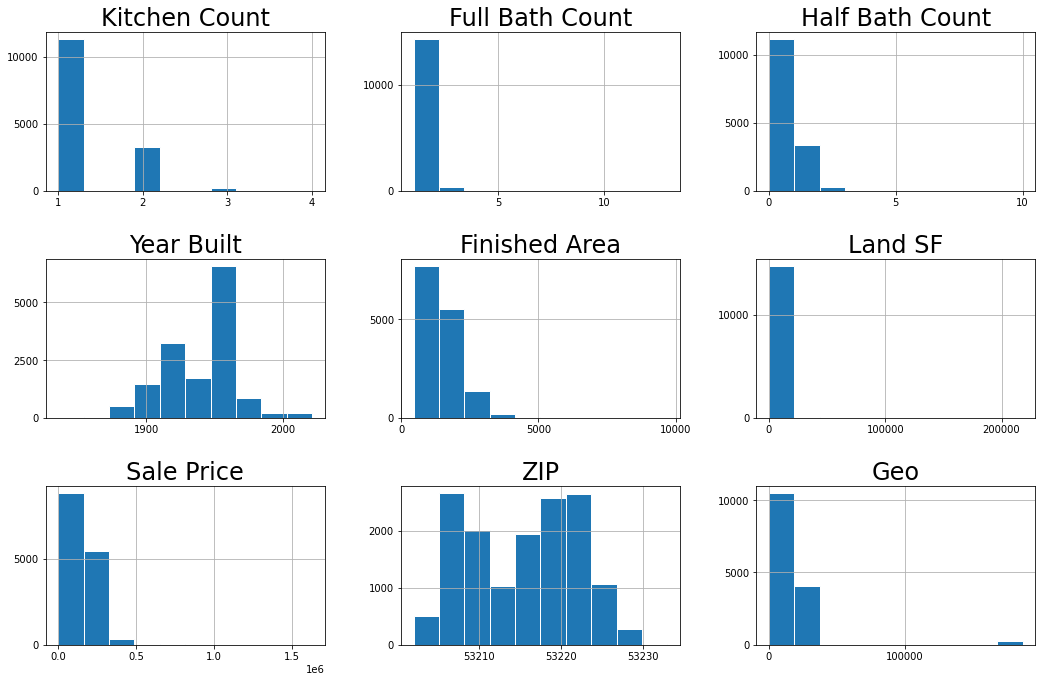

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
sns.set(font_scale=2)
data['KITCHEN_CT'].hist(ax=axes[0,0]);
axes[0,0].set_title('Kitchen Count');
data['FULL_BATH_CT'].hist(ax=axes[0,1]);
axes[0,1].set_title('Full Bath Count');
data['HALF_BATH_CT'].hist(ax=axes[0,2]);
axes[0,2].set_title('Half Bath Count');
data['YEAR_BUILT'].hist(ax=axes[1,0]);
axes[1,0].set_title('Year Built');
data['FINISHED_AREA'].hist(ax=axes[1,1]);
axes[1,1].set_title('Finished Area');
data['LAND_SF'].hist(ax=axes[1,2]);
axes[1,2].set_title('Land SF');
data['SALE_PRICE'].hist(ax=axes[2,0]);
axes[2,0].set_title('Sale Price');
data['ZIP'].hist(ax=axes[2,1]);
axes[2,1].set_title('ZIP');
data['GEO_TRACT'].hist(ax=axes[2,2]);
axes[2,2].set_title('Geo');
#data['MiscVal'].hist(ax=axes[1,4]);
#axes[1,4].set_title('MisVal');
plt.tight_layout();

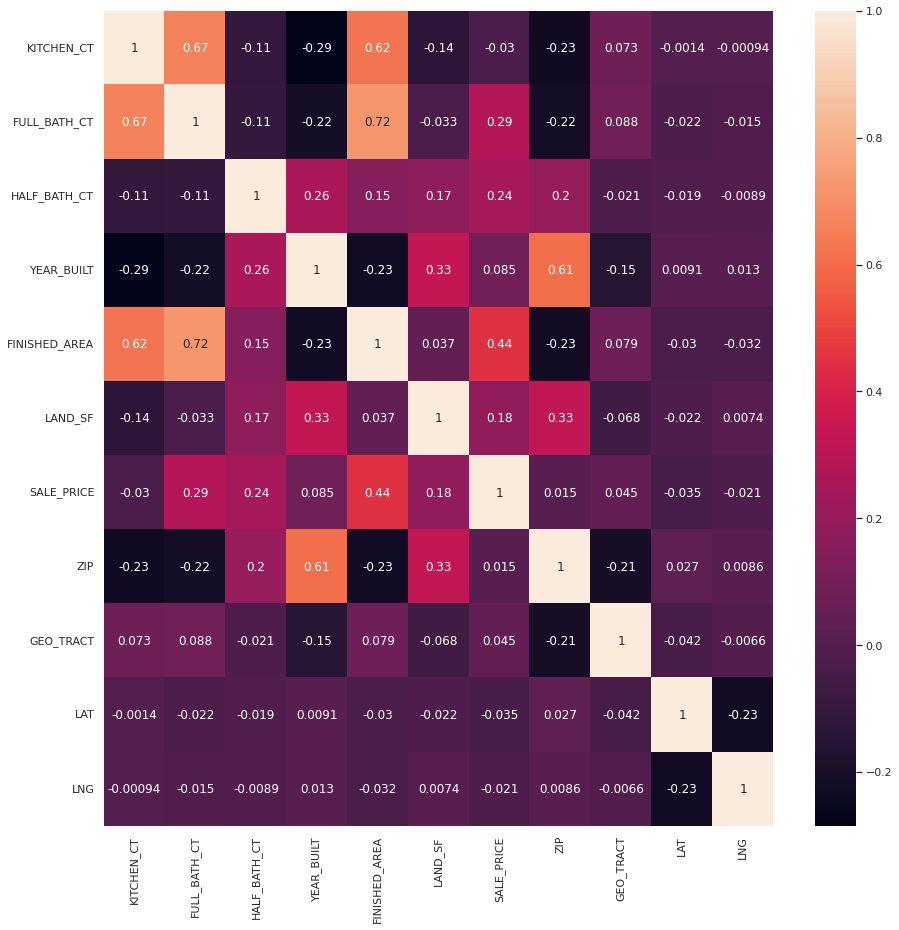

In [ ]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(data.corr(),annot=True);

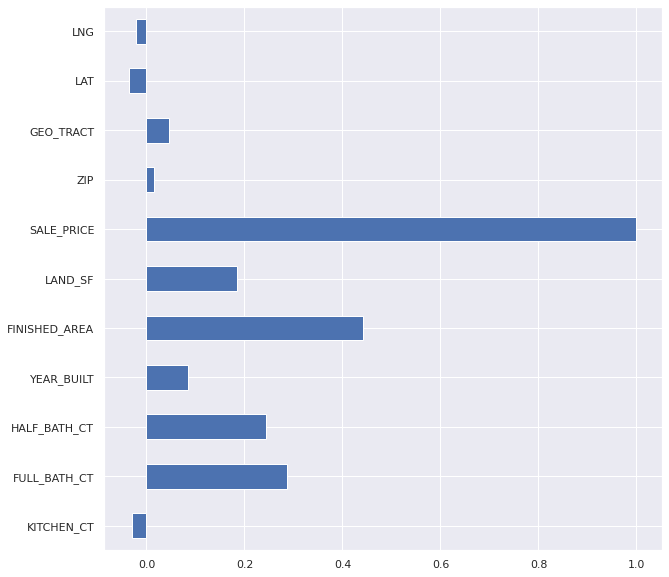

In [ ]:
plt.figure(figsize=(10,10))
data.corr()['SALE_PRICE'].plot(kind='barh');

In [ ]:
numer = set(data.corr()['SALE_PRICE'].index)
categ = list(set(data.columns) - set(data.corr()['SALE_PRICE'].index))

In [ ]:
numer
categ.remove('ADDRESS')
categ.remove('SALE_DATE')
categ.remove('NBHD')
categ

['APPRAISER', 'BLD_TYPE', 'QUAL', 'FULL_BATH_RATING', 'COND', 'KITCHEN_RATING']

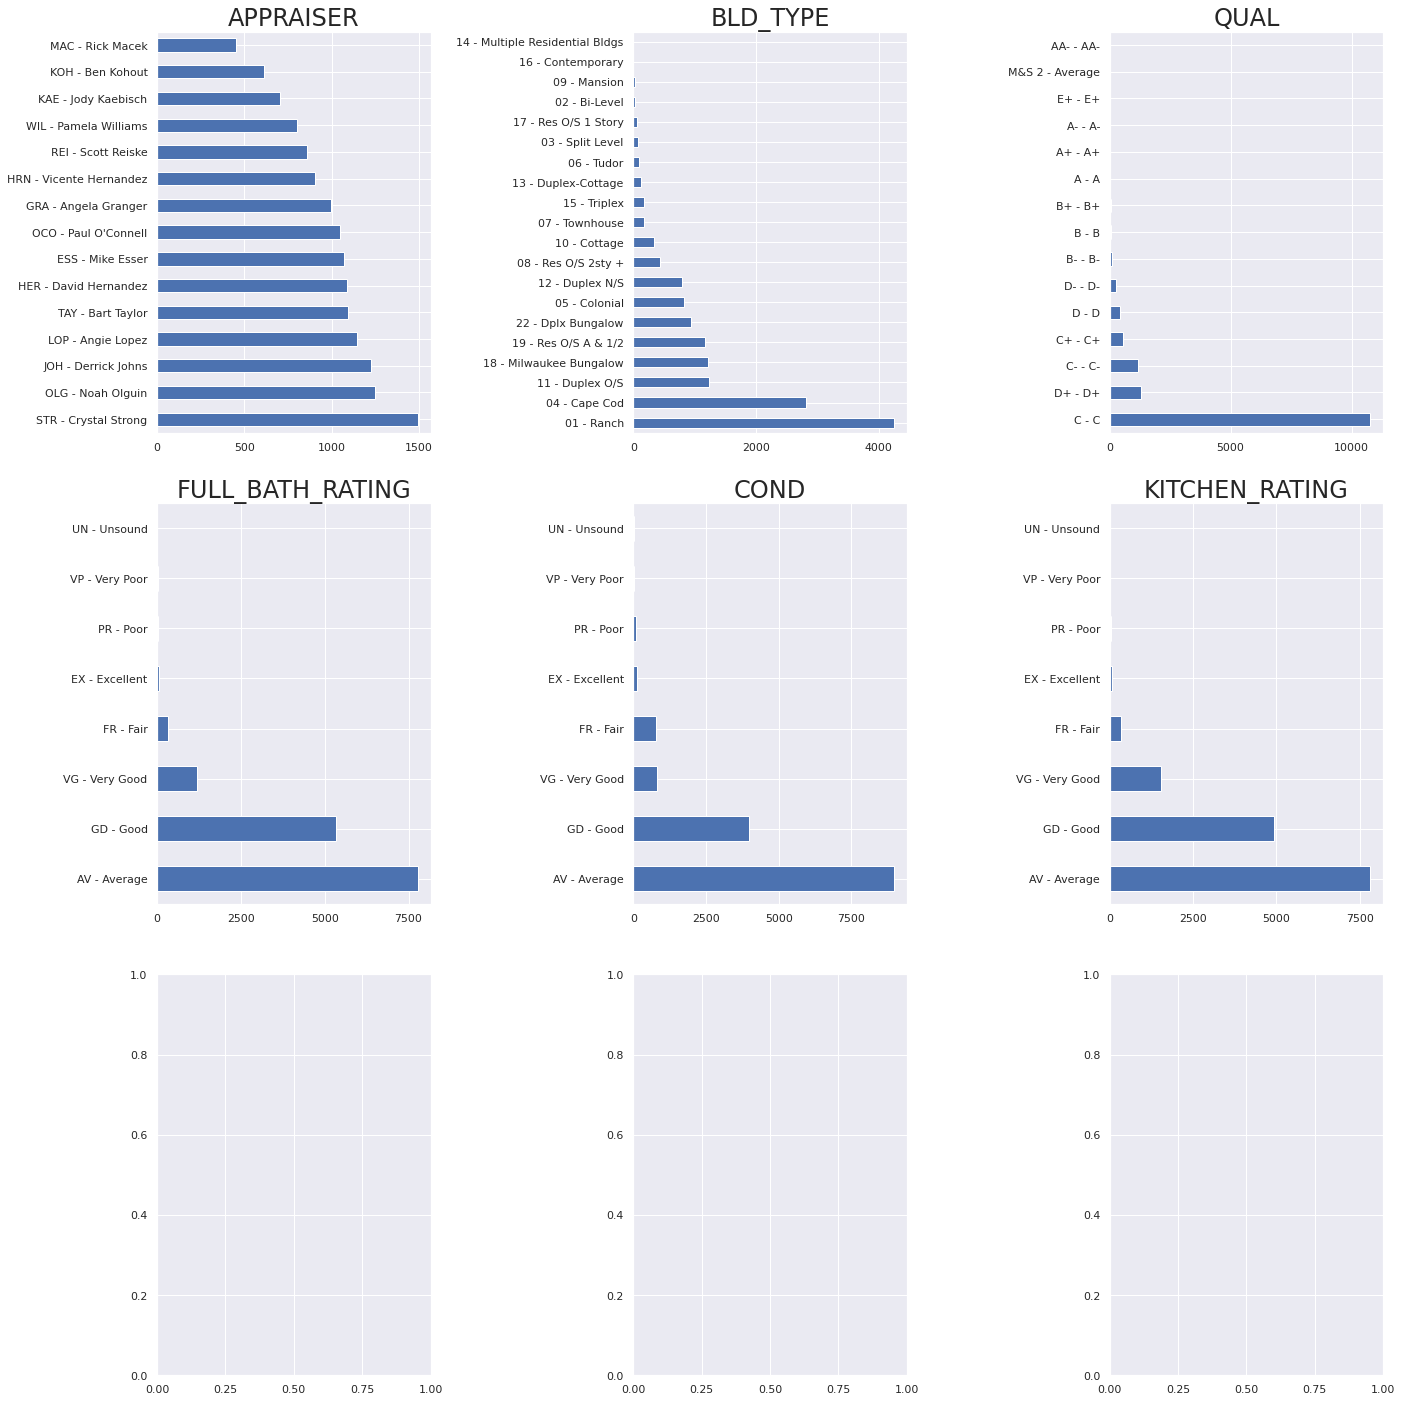

In [ ]:
sns.set()
n_row = 3
n_col = 3
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sns.set(font_scale=2)
for i in enumerate(categ):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


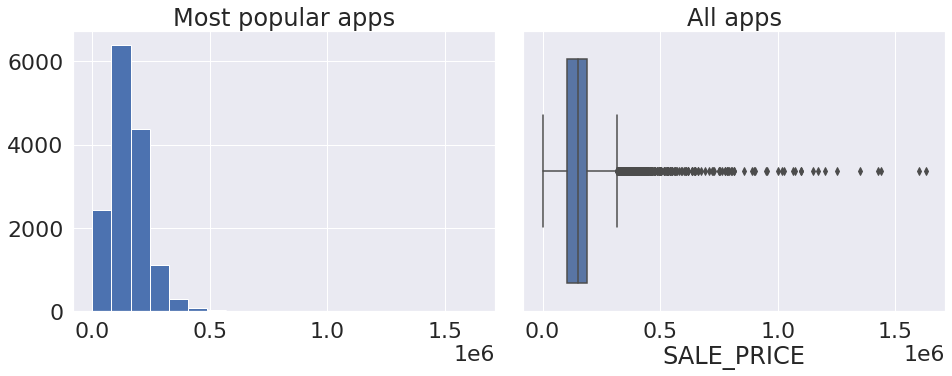

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Most popular apps')
data['SALE_PRICE'].hist(bins=20);
ax2 = fig.add_subplot(2,3,2)
ax2.set_title('All apps')
sns.boxplot(data['SALE_PRICE'])
plt.tight_layout()

In [ ]:
np.percentile(data['SALE_PRICE'], 95)

292719.9999999997

In [ ]:
print(pd.value_counts(data['SALE_PRICE']<292719.9999999997))
data_new = data[data['SALE_PRICE']<292719.9999999997]
target_val = data['SALE_PRICE'].values

True     14017
False      738
Name: SALE_PRICE, dtype: int64


In [ ]:
data_targ = data.copy()
for i in categ:
    data_targ[i] = data_targ[i].factorize()[0]

data_targ.drop(['NBHD', 'SALE_PRICE', 'ADDRESS', 'SALE_DATE'], axis=1,inplace=True)


data_targ.replace([np.inf, -np.inf], np.nan, inplace=True) 
data_targ.dropna(inplace = True)

BLD_TYPE            0
APPRAISER           0
QUAL                0
COND                0
KITCHEN_CT          0
KITCHEN_RATING      0
FULL_BATH_CT        0
FULL_BATH_RATING    0
HALF_BATH_CT        0
YEAR_BUILT          0
FINISHED_AREA       0
LAND_SF             0
ZIP                 0
GEO_TRACT           0
LAT                 0
LNG                 0
dtype: int64

In [ ]:
nrm = Normalizer()
nrm.fit(data_targ)
normal_data = nrm.transform(data_targ)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


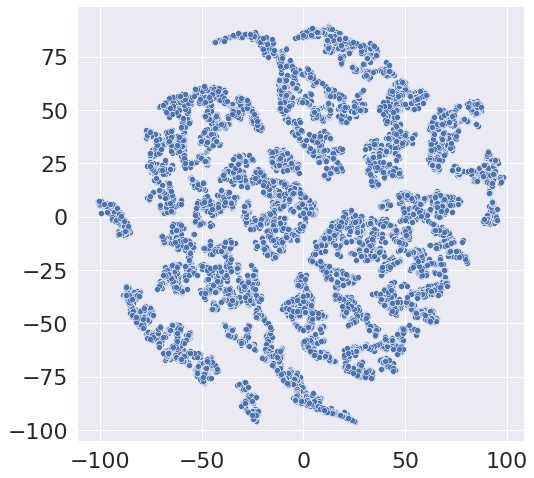

In [ ]:
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

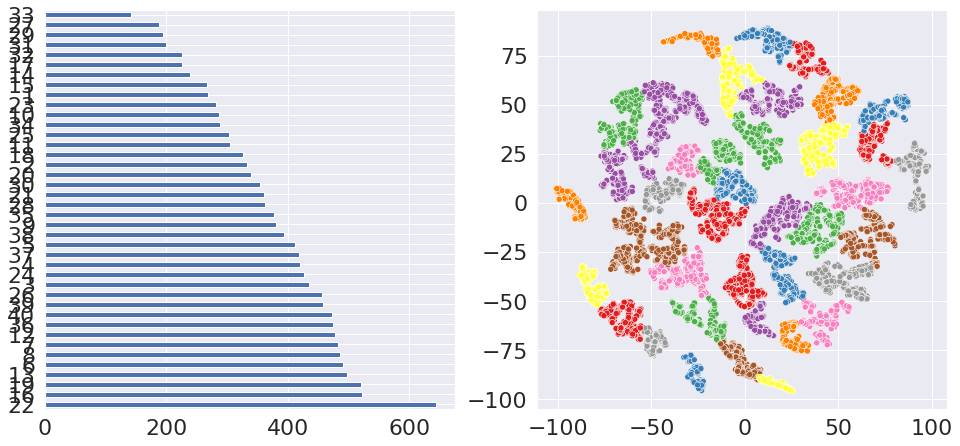

In [ ]:
link = ward(res_tsne)
vb = fcluster(link,t=300, criterion='distance')
fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(3,3,1)
pd.value_counts(vb).plot(kind='barh')
ax2 = fig.add_subplot(3,3,2)
axpl_2 = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");
axpl_2.legend_.remove()

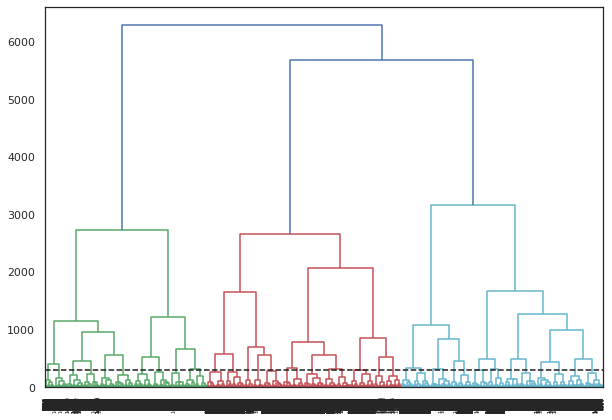

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,7))
#link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [300,300],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()